In [ ]:
!pip install category_encoders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder 
from datetime import datetime
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import time
from sklearn.preprocessing import LabelEncoder
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 3.9 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def dumppers(string1,string2):
  file = open(string1, 'wb')

  # dump information to that file
  pickle.dump(string2, file)

  # close the file
  file.close()

In [ ]:
data3 = pd.read_csv("movies-revenue-classification.csv")
data1 = pd.read_csv("movie-director.csv") #name
data2 = pd.read_csv("movie-voice-actors.csv") #movie


In [ ]:
data1.rename(columns={'name': 'movie_title'}, inplace=True)
data2.rename(columns={'movie': 'movie_title'}, inplace=True)

In [ ]:
data = pd.merge(data3,data1[['movie_title','director']],on='movie_title', how='left')

In [ ]:
data_actors= data2.groupby('movie_title')['voice-actor'].agg(list)

In [ ]:
my_data = pd.merge(data,data_actors,on='movie_title', how='left')

In [ ]:
my_data.isnull().sum()

movie_title            0
release_date           0
genre                 14
MPAA_rating           47
MovieSuccessLevel      0
director             428
voice-actor          424
dtype: int64

In [ ]:
my_data['release_date'] = pd.to_datetime(my_data['release_date'])
my_data['release_date'] = pd.DatetimeIndex(my_data['release_date']).year

In [ ]:
!pip install tmdbv3api
from tmdbv3api import TMDb
tmdb = TMDb()
tmdb.api_key = 'f28265b95227d640ac243fdb15a509a6'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tmdb.language = 'en'
tmdb.debug = True

In [ ]:
from tmdbv3api import Movie
movie = Movie()

In [ ]:
for index, row in my_data.iterrows():
  if(row["release_date"] > 2022):
    my_data.at[index,"release_date"] = row["release_date"] - 100

In [ ]:
cnt = 0
for index, row in my_data.iterrows():
  if pd.isna(my_data.iloc[index,5]):
    search = movie.search(row["movie_title"])
    for res in search:
      #if res.original_title == row["movie_title"]:
      if "release_date" in res.keys():
        if str(row["release_date"]) in res.release_date:
          crew = movie.credits(res.id)["crew"]
          for x in crew:
            if(x["job"].lower() == "director"):
              cnt = cnt + 1
              my_data.at[index,"director"] = x.name
              #df.loc[len(df.index)] = [res.original_title, x.name] 
             # print(res.original_title+ ",  "+ x.name)
              break;
          break;
      
#print(cnt)

In [ ]:
my_data.isnull().sum()

movie_title            0
release_date           0
genre                 14
MPAA_rating           47
MovieSuccessLevel      0
director              19
voice-actor          424
dtype: int64

In [ ]:
dic = dict()
for index, row in my_data.iterrows():      
    if row["director"] in dic.keys():
      dic[row["director"]]= dic[row["director"]]+1
    else:
      dic[row["director"]]=1

In [ ]:
print(dic)

{'Chuck Sheetz': 1, 'Sam Weisman': 2, 'Will Finn': 1, 'Simon Wincer': 2, 'Brian Gibson': 1, 'Hamilton Luske': 2, 'Rob Pritts': 1, 'Frank Coraci': 2, 'Anthony Russo': 2, 'Gore Verbinski': 3, 'Jay Russell': 2, 'David McNally': 1, 'Randall Miller': 1, 'Warren Beatty': 1, 'Bill Duke': 2, 'Bob Hathcock': 1, 'Mark Herman': 1, 'Gary Trousdale': 3, 'John R. Cherry III': 4, 'Peyton Reed': 1, 'Brian Robbins': 1, 'Wes Anderson': 3, 'Gábor Csupó': 1, 'David Frankel': 1, 'John Lasseter': 5, 'Emile Ardolino': 2, 'Stuart Orme': 1, 'M. Night Shyamalan': 3, 'Albert Hughes': 1, 'Niki Caro': 1, 'Taylor Hackford': 1, 'Joss Whedon': 2, 'Gil Junger': 1, nan: 19, 'Frank Perry': 1, 'Luis Mandoki': 2, 'Leonard Nimoy': 2, 'Steven Lawrence': 1, 'Garry Marshall': 6, 'Steve Trenbirth': 1, 'Patrick Hasburgh': 1, 'Peter Bogdanovich': 1, 'Spike Lee': 3, 'Adam Shankman': 3, 'James Neilson': 1, 'Scott Derrickson': 1, 'Les Mayfield': 2, 'George Butler': 1, 'Thom Eberhardt': 2, 'George P. Cosmatos': 1, 'Barry Levinson': 

In [ ]:
dic["Wolfgang Reitherman"]

5

In [ ]:
directorFq = open("directorFq.pkl", "wb")
pickle.dump(dic, directorFq)
directorFq.close()

In [ ]:
my_data

,movie_title,release_date,genre,MPAA_rating,MovieSuccessLevel,director,voice-actor
0,Recess: School's Out,2001,Comedy,G,C,Chuck Sheetz,NaN
1,D2: The Mighty Ducks,1994,Comedy,PG,B,Sam Weisman,NaN
2,Home on the Range,2004,Comedy,PG,C,Will Finn,"[Randy Quaid, Estelle Harris, Cuba Gooding Jr...."
3,Young Black Stallion,2003,Adventure,G,D,Simon Wincer,NaN
4,What's Love Got to Do With It,1993,Drama,R,B,Brian Gibson,NaN
...,...,...,...,...,...,...,...
458,Sweet Home Alabama,2002,Comedy,PG-13,B,Andy Tennant,NaN
459,Play it to the Bone,1999,Comedy,R,D,Ron Shelton,NaN
460,The Odd Life of Timothy Green,2012,Drama,PG,C,Peter Hedges,NaN
461,Honey I Blew Up the Kid,1992,Comedy,PG,B,Randal Kleiser,NaN


In [ ]:
for idx,row in my_data.iterrows():
  if pd.isna(my_data.iloc[idx,5]):
    continue
  my_data.at[idx,"director"]=dic[ my_data.at[idx,"director"]]

In [ ]:
my_data

,movie_title,release_date,genre,MPAA_rating,MovieSuccessLevel,director,voice-actor
0,Recess: School's Out,2001,Comedy,G,C,1,NaN
1,D2: The Mighty Ducks,1994,Comedy,PG,B,2,NaN
2,Home on the Range,2004,Comedy,PG,C,1,"[Randy Quaid, Estelle Harris, Cuba Gooding Jr...."
3,Young Black Stallion,2003,Adventure,G,D,2,NaN
4,What's Love Got to Do With It,1993,Drama,R,B,1,NaN
...,...,...,...,...,...,...,...
458,Sweet Home Alabama,2002,Comedy,PG-13,B,1,NaN
459,Play it to the Bone,1999,Comedy,R,D,2,NaN
460,The Odd Life of Timothy Green,2012,Drama,PG,C,2,NaN
461,Honey I Blew Up the Kid,1992,Comedy,PG,B,2,NaN


In [ ]:
print(my_data['MPAA_rating'].value_counts().sort_values(ascending=False))

PG           156
PG-13        111
R             76
G             70
Not Rated      3
Name: MPAA_rating, dtype: int64


In [ ]:
top2_rating = [x for x in my_data['MPAA_rating'].value_counts().sort_values(ascending=False).head(2).index]
rating = [x for x in my_data['MPAA_rating'].value_counts().sort_values(ascending=True).head(3).index]
for l in top2_rating:
  my_data[l] = np.where(my_data['MPAA_rating']==l,1,0)

In [ ]:
ratingCols = open("ratingCols.pkl", "wb")
pickle.dump(top2_rating, ratingCols)
ratingCols.close()

In [ ]:
otherCols = open("otherRatingCols.pkl", "wb")
pickle.dump(rating, otherCols)
otherCols.close()

In [ ]:
my_data["other_rating"] = " "
for idx,row in my_data.iterrows():
  if pd.isna(my_data.iloc[idx,3]):
    my_data["other_rating"][idx]=0
  if my_data["MPAA_rating"][idx] in rating:
    my_data["other_rating"][idx]=1
  else:
     my_data["other_rating"][idx]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
print(my_data['genre'].value_counts().sort_values(ascending=False))

Comedy                 146
Adventure              105
Drama                   90
Action                  30
Romantic Comedy         20
Thriller/Suspense       18
Documentary             15
Musical                 12
Western                  5
Horror                   4
Black Comedy             3
Concert/Performance      1
Name: genre, dtype: int64


In [ ]:
top3_genre = [x for x in my_data['genre'].value_counts().sort_values(ascending=False).head(3).index]
genre = [x for x in my_data['genre'].value_counts().sort_values(ascending=True).head(9).index]
for l in top3_genre:
  my_data[l] = np.where(my_data['genre']==l,1,0)

In [ ]:
genreCols = open("genreCols.pkl", "wb")
pickle.dump(top3_genre, genreCols)
genreCols.close()

In [ ]:
otherCols = open("otherGenreCols.pkl", "wb")
pickle.dump(genre, otherCols)
otherCols.close()

In [ ]:
my_data["other_genre"] = " "
for idx,row in my_data.iterrows():
  if pd.isna(my_data.iloc[idx,2]):
    my_data["other_genre"][idx]=0
  if my_data["genre"][idx] in genre:
    my_data["other_genre"][idx]=1
  else:
     my_data["other_genre"][idx]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
my_data= my_data.drop("genre",axis = 1)

In [ ]:
my_data= my_data.drop("MPAA_rating",axis = 1)

In [ ]:
my_data

,movie_title,release_date,MovieSuccessLevel,director,voice-actor,PG,PG-13,other_rating,Comedy,Adventure,Drama,other_genre
0,Recess: School's Out,2001,C,1,NaN,0,0,1,1,0,0,0
1,D2: The Mighty Ducks,1994,B,2,NaN,1,0,0,1,0,0,0
2,Home on the Range,2004,C,1,"[Randy Quaid, Estelle Harris, Cuba Gooding Jr....",1,0,0,1,0,0,0
3,Young Black Stallion,2003,D,2,NaN,0,0,1,0,1,0,0
4,What's Love Got to Do With It,1993,B,1,NaN,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
458,Sweet Home Alabama,2002,B,1,NaN,0,1,0,1,0,0,0
459,Play it to the Bone,1999,D,2,NaN,0,0,1,1,0,0,0
460,The Odd Life of Timothy Green,2012,C,2,NaN,1,0,0,0,0,1,0
461,Honey I Blew Up the Kid,1992,B,2,NaN,1,0,0,1,0,0,0


In [ ]:
for index, row in my_data.iterrows():
  if type(my_data.iloc[index,2]) is list:
    continue;
  actors = []
  search = movie.search(row["movie_title"])
  for res in search:
    if "release_date" in res.keys():
      if str(row["release_date"]) in res.release_date:
        cast = movie.credits(res.id)["cast"]
        for x in cast:
          actors.append(x.name)
        my_data.at[index,"voice-actor"] = actors
        break;

In [ ]:
my_data

,movie_title,release_date,MovieSuccessLevel,director,voice-actor,PG,PG-13,other_rating,Comedy,Adventure,Drama,other_genre
0,Recess: School's Out,2001,C,1,"[Andrew Lawrence, Rickey D'Shon Collins, Pamel...",0,0,1,1,0,0,0
1,D2: The Mighty Ducks,1994,B,2,"[Emilio Estevez, Kathryn Erbe, Michael Tucker,...",1,0,0,1,0,0,0
2,Home on the Range,2004,C,1,"[Roseanne Barr, Judi Dench, Jennifer Tilly, St...",1,0,0,1,0,0,0
3,Young Black Stallion,2003,D,2,"[Biana Tamimi, Richard Romanus, Patrick Elias,...",0,0,1,0,1,0,0
4,What's Love Got to Do With It,1993,B,1,"[Angela Bassett, Laurence Fishburne, Vanessa B...",0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
458,Sweet Home Alabama,2002,B,1,"[Reese Witherspoon, Josh Lucas, Patrick Dempse...",0,1,0,1,0,0,0
459,Play it to the Bone,1999,D,2,"[Antonio Banderas, Woody Harrelson, Lolita Dav...",0,0,1,1,0,0,0
460,The Odd Life of Timothy Green,2012,C,2,"[Jennifer Garner, Joel Edgerton, Ron Livingsto...",1,0,0,0,0,1,0
461,Honey I Blew Up the Kid,1992,B,2,"[Rick Moranis, Marcia Strassman, Robert Oliver...",1,0,0,1,0,0,0


In [ ]:
my_data.isnull().sum()

movie_title           0
release_date          0
MovieSuccessLevel     0
director             19
voice-actor          19
PG                    0
PG-13                 0
other_rating          0
Comedy                0
Adventure             0
Drama                 0
other_genre           0
dtype: int64

In [ ]:
dic = dict()
for index, row in my_data.iterrows(): 
  if  type  (row['voice-actor'])is list:
   for actor in row['voice-actor']:     
     if actor in dic.keys():
       dic[actor]= dic[actor]+1
     else:
       dic[actor]=1


In [ ]:
print(dic["J. Pat O'Malley"])

2


In [ ]:
actorFq = open("actorFq.pkl", "wb")
pickle.dump(dic, actorFq)
actorFq.close()

In [ ]:
for index, row in my_data.iterrows():
  if  type  (row['voice-actor'])is list:
    fq = 0
    for actor in row['voice-actor']:
      fq = fq + dic[actor]
    my_data.at[index,"voice-actor"] = fq

In [ ]:
for index, row in my_data.iterrows():
    my_data.at[index,"nameDest"]

In [ ]:
my_data= my_data.drop("movie_title",axis = 1)

In [ ]:
my_data

,release_date,MovieSuccessLevel,director,voice-actor,PG,PG-13,other_rating,Comedy,Adventure,Drama,other_genre
0,2001,C,1,117,0,0,1,1,0,0,0
1,1994,B,2,84,1,0,0,1,0,0,0
2,2004,C,1,97,1,0,0,1,0,0,0
3,2003,D,2,7,0,0,1,0,1,0,0
4,1993,B,1,46,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
458,2002,B,1,73,0,1,0,1,0,0,0
459,1999,D,2,57,0,0,1,1,0,0,0
460,2012,C,2,63,1,0,0,0,0,1,0
461,1992,B,2,26,1,0,0,1,0,0,0


In [ ]:
label = my_data["MovieSuccessLevel"]

In [ ]:
my_data = my_data.drop("MovieSuccessLevel",axis = 1)

In [ ]:
from sklearn.impute import KNNImputer
from numpy import isnan

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(my_data)
knnImputerFile = open("knnimputer.pkl", "wb")
pickle.dump(imputer, knnImputerFile)
knnImputerFile.close()
Xtrans = imputer.transform(my_data)

In [ ]:
Xtrans

array([[2.001e+03, 1.000e+00, 1.170e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.994e+03, 2.000e+00, 8.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.004e+03, 1.000e+00, 9.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.012e+03, 2.000e+00, 6.300e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.992e+03, 2.000e+00, 2.600e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.997e+03, 6.000e+00, 1.530e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
my_data = pd.DataFrame(Xtrans, columns=my_data.columns)

In [ ]:
my_data

,release_date,director,voice-actor,PG,PG-13,other_rating,Comedy,Adventure,Drama,other_genre
0,2001.0,1.0,117.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1994.0,2.0,84.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2004.0,1.0,97.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2003.0,2.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1993.0,1.0,46.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
458,2002.0,1.0,73.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
459,1999.0,2.0,57.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
460,2012.0,2.0,63.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
461,1992.0,2.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
my_data.isnull().sum()

release_date    0
director        0
voice-actor     0
PG              0
PG-13           0
other_rating    0
Comedy          0
Adventure       0
Drama           0
other_genre     0
dtype: int64

In [ ]:
for col in my_data.columns:
  my_data[col] = my_data[col].astype(int)

In [ ]:
my_data

,release_date,director,voice-actor,PG,PG-13,other_rating,Comedy,Adventure,Drama,other_genre
0,2001,1,117,0,0,1,1,0,0,0
1,1994,2,84,1,0,0,1,0,0,0
2,2004,1,97,1,0,0,1,0,0,0
3,2003,2,7,0,0,1,0,1,0,0
4,1993,1,46,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
458,2002,1,73,0,1,0,1,0,0,0
459,1999,2,57,0,0,1,1,0,0,0
460,2012,2,63,1,0,0,0,0,1,0
461,1992,2,26,1,0,0,1,0,0,0


In [ ]:
print(label.value_counts().sort_values(ascending=False))

C    164
B    130
D    100
A     56
S     13
Name: MovieSuccessLevel, dtype: int64


In [ ]:
success = {"S": 5, "A" : 4, "B":3,"C":2,"D":1}

In [ ]:
for i in range(len(label)):
  label[i] = success[label[i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
label = label.astype(int)

In [ ]:
label

0      2
1      3
2      2
3      1
4      3
      ..
458    3
459    1
460    2
461    3
462    3
Name: MovieSuccessLevel, Length: 463, dtype: int64

In [ ]:
x = my_data

In [ ]:
droppedCols = list()

In [ ]:
import scipy.stats 
for col_name in my_data.columns:
  corr, pval = scipy.stats.pearsonr(my_data[col_name],label)
  if pval <= 0.1:
    print(col_name)
    print(pval)
  else:
    x = x.drop(col_name, axis = 1)
    droppedCols.append(col_name)


release_date
0.03382760729235466
director
2.655517455791592e-08
voice-actor
1.6122498426189607e-20
PG
0.058511637032679524
Adventure
1.2178849976443258e-09
Drama
0.008740476336419426


In [ ]:
droppedColsFile = open("droppedCols.pkl", "wb")
pickle.dump(droppedCols, droppedColsFile)
droppedColsFile.close()

In [ ]:
x

,release_date,director,voice-actor,PG,Adventure,Drama
0,2001,1,117,0,0,0
1,1994,2,84,1,0,0
2,2004,1,97,1,0,0
3,2003,2,7,0,1,0
4,1993,1,46,0,0,1
...,...,...,...,...,...,...
458,2002,1,73,0,0,0
459,1999,2,57,0,0,0
460,2012,2,63,1,0,1
461,1992,2,26,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, label, train_size=0.80,shuffle=True, random_state=42)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier

In [ ]:
modelsList = list()
accList = list()
trainTime = list()
testTime = list()

In [ ]:
start = time.time()
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(X_train, y_train)
stop = time.time()
print("Training Time for Linear Kernel: ", stop - start)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
stop2=time.time()
print("Training Time for Radial Basis Kernel: ", stop2-stop)
poly = svm.SVC(kernel='poly', degree=7, C=1, decision_function_shape='ovo').fit(X_train, y_train)
stop3 =time.time()
print("Training Time for Polynomial Kernel:", stop3-stop2)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)
stop4 = time.time()
print("Training Time for Sigmoid Kernel:", stop4-stop3)

Training Time for Linear Kernel:  0.4574258327484131
Training Time for Radial Basis Kernel:  0.01936793327331543
Training Time for Polynomial Kernel: 0.008819341659545898
Training Time for Sigmoid Kernel: 0.016736268997192383


In [ ]:
start = time.time()
accuracy_lin = linear.score(X_test, y_test)
stop = time.time()
print("Testing Time for Linear Kernel: ", stop - start)
accuracy_poly = poly.score(X_test, y_test)
stop2 = time.time()
print("Testing Time for polynomial Kernel: ", stop2 - stop)
accuracy_rbf = rbf.score(X_test, y_test)
stop3 = time.time()
print("Testing Time for Radial Basis Kernel: ", stop3 - stop2)
accuracy_sig = sig.score(X_test, y_test)
stop4 = time.time()
print("Testing Time for sigmoid Kernel: ", stop4 - stop3)

Testing Time for Linear Kernel:  0.004171609878540039
Testing Time for polynomial Kernel:  0.005733966827392578
Testing Time for Radial Basis Kernel:  0.006109952926635742
Testing Time for sigmoid Kernel:  0.0046651363372802734


In [ ]:
print("Accuracy Linear Kernel:", accuracy_lin*100)
print("Accuracy Polynomial Kernel:", accuracy_poly*100)
print("Accuracy Radial Basis Kernel:", accuracy_rbf*100)
print("Accuracy Sigmoid Kernel:", accuracy_sig*100)

Accuracy Linear Kernel: 40.86021505376344
Accuracy Polynomial Kernel: 37.634408602150536
Accuracy Radial Basis Kernel: 32.25806451612903
Accuracy Sigmoid Kernel: 33.33333333333333


In [ ]:
start = time.time()
linear1 = svm.SVC(kernel='linear', C=1.5, decision_function_shape='ovr').fit(X_train, y_train)
stop = time.time()
print("Training Time for Linear for c=1.5 :", stop-start)
linear2 = svm.SVC(kernel='linear', C=0.5, decision_function_shape='ovr').fit(X_train, y_train)
stop2 = time.time()
print("Training Time for Linear for c=0.5 :", stop2-stop)
linear3 = svm.SVC(kernel='linear', C=0.25, decision_function_shape='ovr').fit(X_train, y_train)
dumppers('linearSVM.sav',linear3)
modelsList.append("linearSVM")
stop3=time.time()
print("Training Time for Linear for c=0.25 :",stop3-stop2)
trainTime.append(stop3-stop2)

Training Time for Linear for c=1.5 : 0.5425434112548828
Training Time for Linear for c=0.5 : 0.2905418872833252
Training Time for Linear for c=0.25 : 0.14197540283203125


In [ ]:
start = time.time()
accuracy_lin1 = linear1.score(X_test, y_test)
stop = time.time()
print("Testing Time for Linear for c=1.5 :", stop-start)
accuracy_lin2 = linear2.score(X_test, y_test)
stop2 = time.time()
print("Testing Time for Linear for c=.5 :", stop2-stop)
accuracy_lin3 = linear3.score(X_test, y_test)
stop3 = time.time()
print("Testing Time for Linear for c=.25 :", stop3-stop2)
testTime.append(stop3-stop2)

Testing Time for Linear for c=1.5 : 0.003805875778198242
Testing Time for Linear for c=.5 : 0.005105733871459961
Testing Time for Linear for c=.25 : 0.0045928955078125


In [ ]:
print("Accuracy Linear for c=1.5 :", accuracy_lin1*100)
print("Accuracy Linear for c=0.5 :", accuracy_lin2*100)
print("Accuracy Linear for c=0.25 :",accuracy_lin3*100)
accList.append(accuracy_lin3*100)


Accuracy Linear for c=1.5 : 40.86021505376344
Accuracy Linear for c=0.5 : 41.935483870967744
Accuracy Linear for c=0.25 : 41.935483870967744


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
start = time.time()
classifier.fit(X_train, y_train)
stop = time.time() 
print("Training Time for logistic regression:", stop-start)
trainTime.append(stop-start)
dumppers('LogisticRegression.sav',classifier)
modelsList.append("Logistic Regrission")
start = time.time()
predictions = classifier.predict(X_test)
accuracy=np.mean(predictions == y_test)*100
stop = time.time()
print("Testing Time for logistic regression:", stop-start)
accList.append(accuracy)
testTime.append(stop-start)
print (str(accuracy))

Training Time for logistic regression: 0.04455685615539551
Testing Time for logistic regression: 0.0018837451934814453
41.935483870967744


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                         algorithm="SAMME",
                         n_estimators=100, random_state=60,learning_rate=1)
start = time.time()
bdt.fit(X_train,y_train)
stop = time.time() 
print ("Training Time for using Decision Tree n_estimators=100 and learning_rate=1 " , stop-start)
y_prediction = bdt.predict(X_test)
accuracy=np.mean(y_prediction == y_test)*100
stop2 = time.time()
print ("Testing Time for using Decision Tree n_estimators=100 and learning_rate=1 " , stop2-stop)
print ("The achieved accuracy using Decision Tree n_estimators=100 and learning_rate=1 " + str(accuracy))

Training Time for using Decision Tree n_estimators=100 and learning_rate=1  0.19874358177185059
Testing Time for using Decision Tree n_estimators=100 and learning_rate=1  0.013443946838378906
The achieved accuracy using Decision Tree n_estimators=100 and learning_rate=1 43.01075268817204


In [ ]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                         algorithm="SAMME",
                         n_estimators=100, random_state=60,learning_rate=0.7)
start = time.time()
bdt.fit(X_train,y_train)
stop = time.time() 
print ("Training Time for using Decision Tree n_estimators=100 and learning_rate=0.7 " , stop-start)
y_prediction = bdt.predict(X_test)
accuracy=np.mean(y_prediction == y_test)*100
stop2 = time.time()
print ("Testing Time for using Decision Tree n_estimators=100 and learning_rate=0.7 " , stop2-stop)
print ("The achieved accuracy using Decision Tree n_estimators=100 and learning_rate=0.7 " + str(accuracy))

Training Time for using Decision Tree n_estimators=100 and learning_rate=0.7  0.19646000862121582
Testing Time for using Decision Tree n_estimators=100 and learning_rate=0.7  0.01338648796081543
The achieved accuracy using Decision Tree n_estimators=100 and learning_rate=0.7 41.935483870967744


In [ ]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                         algorithm="SAMME",
                         n_estimators=100, random_state=60,learning_rate=0.5)
start = time.time()
bdt.fit(X_train,y_train)
stop = time.time() 
print ("Training Time for using Decision Tree n_estimators=100 and learning_rate=0.5 " , stop-start)
y_prediction = bdt.predict(X_test)
accuracy=np.mean(y_prediction == y_test)*100
stop2 = time.time()
print ("Testing Time for using Decision Tree n_estimators=100 and learning_rate=0.5 " , stop2-stop)
print ("The achieved accuracy using Decision Tree n_estimators=100 and learning_rate=0.5 " + str(accuracy))

Training Time for using Decision Tree n_estimators=100 and learning_rate=0.5  0.20178556442260742
Testing Time for using Decision Tree n_estimators=100 and learning_rate=0.5  0.014211416244506836
The achieved accuracy using Decision Tree n_estimators=100 and learning_rate=0.5 40.86021505376344


In [ ]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                         algorithm="SAMME",
                         n_estimators=90, random_state=60,learning_rate=1)
start = time.time()
bdt.fit(X_train,y_train)
stop = time.time() 
print ("Training Time for using Decision Tree n_estimators=90 and learning_rate=1 " , stop-start)
y_prediction = bdt.predict(X_test)
accuracy=np.mean(y_prediction == y_test)*100
stop2 = time.time()
print ("Testing Time for using Decision Tree n_estimators=90 and learning_rate=1 " , stop2-stop)
print ("The achieved accuracy using Decision Tree n_estimators=90 and learning_rate=1 " + str(accuracy))

Training Time for using Decision Tree n_estimators=90 and learning_rate=1  0.1818714141845703
Testing Time for using Decision Tree n_estimators=90 and learning_rate=1  0.013597249984741211
The achieved accuracy using Decision Tree n_estimators=90 and learning_rate=1 41.935483870967744


In [ ]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                         algorithm="SAMME",
                         n_estimators=50, random_state=60,learning_rate=1)
start = time.time()
bdt.fit(X_train,y_train)
dumppers('bdt.sav',bdt)
stop = time.time() 
trainTime.append(stop-start)
modelsList.append("AdaBoost with decision tree")
print ("Training Time for using Decision Tree n_estimators=50 and learning_rate=1 " , stop-start)
y_prediction = bdt.predict(X_test)
accuracy=np.mean(y_prediction == y_test)*100
stop2 = time.time()
print ("Testing Time for using Decision Tree n_estimators=50 and learning_rate=1 " , stop2-stop)
testTime.append(stop2-stop)
print ("The achieved accuracy using Decision Tree n_estimators=50 and learning_rate=1 " + str(accuracy))
accList.append(accuracy)

Training Time for using Decision Tree n_estimators=50 and learning_rate=1  0.10845422744750977
Testing Time for using Decision Tree n_estimators=50 and learning_rate=1  0.00941157341003418
The achieved accuracy using Decision Tree n_estimators=50 and learning_rate=1 37.634408602150536


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features="auto",
                                      max_depth=None,
                                      n_estimators=500,
                                      min_samples_split=5,
                                      min_samples_leaf=1,
                                      bootstrap=True, random_state = 77)
start = time.time()
rfc.fit(X_train,y_train)
stop = time.time() 
print ("Training Time for using Random Forest Classifier max_depth=None and n_estimators=500 " , stop-start)
predictions = rfc.predict(X_test)
accuracy=np.mean(predictions == y_test)*100
stop2 = time.time()
print ("Testing Time for using Random Forest Classifier max_depth=None and n_estimators=500 " , stop2-stop)
print ("The achieved accuracy using Random Forest Classifier max_depth=None and n_estimators=500 " + str(accuracy))

Training Time for using Random Forest Classifier max_depth=None and n_estimators=500  0.7829465866088867
Testing Time for using Random Forest Classifier max_depth=None and n_estimators=500  0.05806398391723633
The achieved accuracy using Random Forest Classifier max_depth=None and n_estimators=500 40.86021505376344


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features="auto",
                                      max_depth=5,
                                      n_estimators=500,
                                      min_samples_split=5,
                                      min_samples_leaf=1,
                                      bootstrap=True, random_state = 77)
start = time.time()
rfc.fit(X_train,y_train)
stop = time.time() 
print ("Training Time for using Random Forest Classifier max_depth=5 and n_estimators=500 " , stop-start)
predictions = rfc.predict(X_test)
accuracy=np.mean(predictions == y_test)*100
stop2 = time.time()
print ("Testing Time for using Random Forest Classifier max_depth=5 and n_estimators=500 " , stop2-stop)
print ("The achieved accuracy using Random Forest Classifier max_depth=5 and n_estimators=500 " + str(accuracy))

Training Time for using Random Forest Classifier max_depth=5 and n_estimators=500  0.6872961521148682
Testing Time for using Random Forest Classifier max_depth=5 and n_estimators=500  0.05862283706665039
The achieved accuracy using Random Forest Classifier max_depth=5 and n_estimators=500 45.16129032258064


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features="auto",
                                      max_depth=10,
                                      n_estimators=500,
                                      min_samples_split=5,
                                      min_samples_leaf=1,
                                      bootstrap=True, random_state = 77)
start = time.time()
rfc.fit(X_train,y_train)
dumppers('rfc.sav',rfc)
modelsList.append("Random Forest classifier")
stop = time.time() 
print ("Training Time for using Random Forest Classifier max_depth=10 and n_estimators=500 " , stop-start)
trainTime.append(stop-start)
predictions = rfc.predict(X_test)
accuracy=np.mean(predictions == y_test)*100
stop2 = time.time()
print ("Testing Time for using Random Forest Classifier max_depth=10 and n_estimators=500 " , stop2-stop)
testTime.append(stop2-stop)
print ("The achieved accuracy using Random Forest Classifier max_depth=10 and n_estimators=500 " + str(accuracy))
accList.append(accuracy)

Training Time for using Random Forest Classifier max_depth=10 and n_estimators=500  0.7767980098724365
Testing Time for using Random Forest Classifier max_depth=10 and n_estimators=500  0.057408809661865234
The achieved accuracy using Random Forest Classifier max_depth=10 and n_estimators=500 45.16129032258064


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features="auto",
                                      max_depth=5,
                                      n_estimators=1000,
                                      min_samples_split=5,
                                      min_samples_leaf=1,
                                      bootstrap=True, random_state = 77)
start = time.time()
rfc.fit(X_train,y_train)
stop = time.time() 
print ("Training Time for using Random Forest Classifier max_depth=5 and n_estimators=1000 " , stop-start)
predictions = rfc.predict(X_test)
accuracy=np.mean(predictions == y_test)*100
stop2 = time.time()
print ("Testing Time for using Random Forest Classifier max_depth=5 and n_estimators=1000 " , stop2-stop)
print ("The achieved accuracy using Random Forest Classifier max_depth=5 and n_estimators=1000 " + str(accuracy))

Training Time for using Random Forest Classifier max_depth=5 and n_estimators=1000  1.4107074737548828
Testing Time for using Random Forest Classifier max_depth=5 and n_estimators=1000  0.11953926086425781
The achieved accuracy using Random Forest Classifier max_depth=5 and n_estimators=1000 45.16129032258064


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features="auto",
                                      max_depth=5,
                                      n_estimators=1500,
                                      min_samples_split=5,
                                      min_samples_leaf=1,
                                      bootstrap=True, random_state = 77)
start = time.time()
rfc.fit(X_train,y_train)
stop = time.time() 
print ("Training Time for using Random Forest Classifier max_depth=5 and n_estimators=1500 " , stop-start)
predictions = rfc.predict(X_test)
accuracy=np.mean(predictions == y_test)*100
stop2 = time.time()
print ("Testing Time for using Random Forest Classifier max_depth=5 and n_estimators=1500 " , stop2-stop)
print ("The achieved accuracy using Random Forest Classifier max_depth=5 and n_estimators=1500 " + str(accuracy))

Training Time for using Random Forest Classifier max_depth=5 and n_estimators=1500  2.1380696296691895
Testing Time for using Random Forest Classifier max_depth=5 and n_estimators=1500  0.15537524223327637
The achieved accuracy using Random Forest Classifier max_depth=5 and n_estimators=1500 45.16129032258064


In [ ]:
print(modelsList)
print(trainTime)
print(testTime)
print(accList)

['linearSVM', 'Logistic Regrission', 'AdaBoost with decision tree', 'Random Forest classifier']
[0.14197540283203125, 0.04455685615539551, 0.10845422744750977, 0.7767980098724365]
[0.0045928955078125, 0.0018837451934814453, 0.00941157341003418, 0.057408809661865234]
[41.935483870967744, 41.935483870967744, 37.634408602150536, 45.16129032258064]


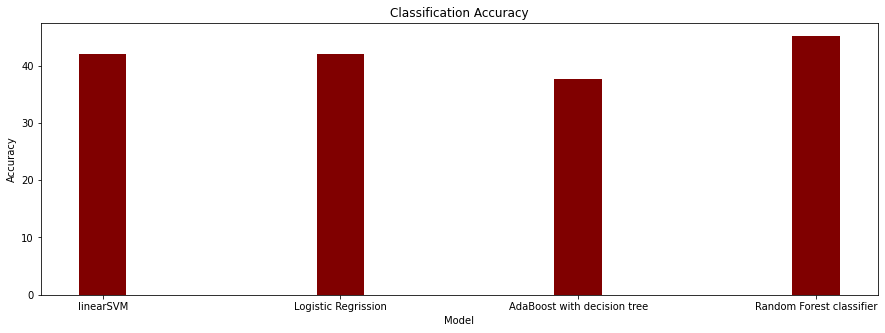

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(modelsList, accList, color ='maroon',
        width = 0.2) 
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy")
plt.show()

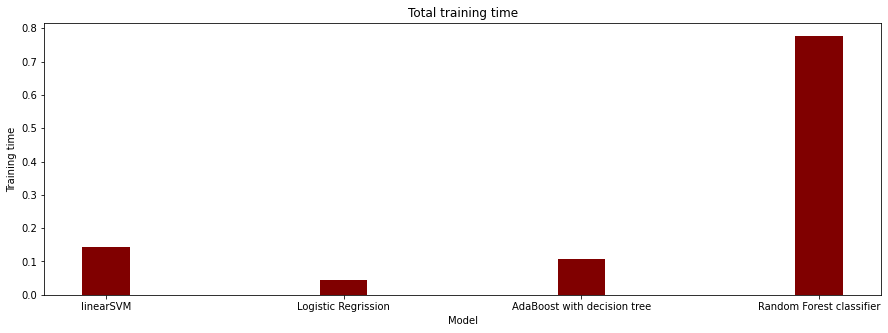

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(modelsList, trainTime, color ='maroon',
        width = 0.2) 
plt.xlabel("Model")
plt.ylabel("Training time")
plt.title("Total training time")
plt.show()

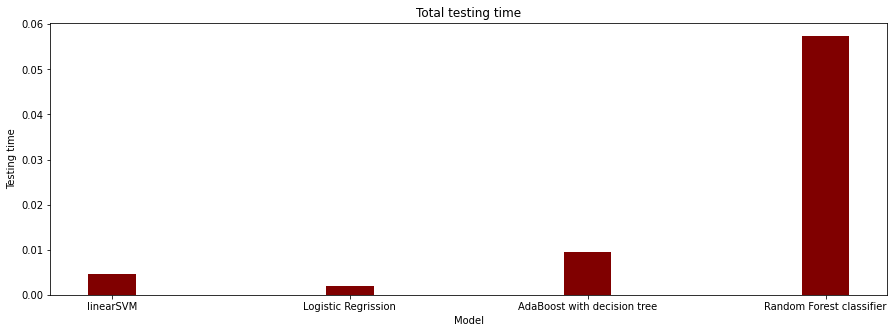

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(modelsList, testTime, color ='maroon',
        width = 0.2) 
plt.xlabel("Model")
plt.ylabel("Testing time")
plt.title("Total testing time")
plt.show()

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   release_date  463 non-null    int64
 1   director      463 non-null    int64
 2   voice-actor   463 non-null    int64
 3   PG            463 non-null    int64
 4   PG-13         463 non-null    int64
 5   other_rating  463 non-null    int64
 6   Comedy        463 non-null    int64
 7   Adventure     463 non-null    int64
 8   Drama         463 non-null    int64
 9   other_genre   463 non-null    int64
dtypes: int64(10)
memory usage: 36.3 KB
